# Lab3 Introduction to PyTorch & Neural Networks Basics



# 0. Why PyTorch?

## 1. Library for ML/DL

## 2. GPU Acceleration

- 간단하게 설명하면, CPU는 복잡한 연산을 매우 빠르게 처리 가능하지만 연산이 직렬로 처리된다.
- 반면 GPU는 간단한 연산을 처리하지만, 연산을 병렬로 처리할 수 있다.
- 머신러닝, 딥러닝의 경우 간단한 연산을 매우 많이 처리해야 하므로 GPU연산이 용이하다.

## 3. Automatic Differentiation

# 1. Tensor

## 1-1. Tensor Generations

- Generations from Data
    - `torch.tensor()`
    - From various types of data(e.g., Python List, Numpy Array, ...)

In [1]:
import torch

# Tensor Generations from Data
array = [[1, 2, 3], [4, 5, 6]]
tensor = torch.tensor(array)
print(tensor)

tensor([[1, 2, 3],
        [4, 5, 6]])


- Generations by Methods
    - `torch.zeros()`, `torch.ones()`, `torch.rand()`, `torch.arange()`, etc.

In [2]:
t1 = torch.zeros(2, 3)
print(t1)

t2 = torch.arange(4)
print(t2)

t3 = torch.rand(2, 2) # 0~1사이의 랜덤한 값
print(t3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0, 1, 2, 3])
tensor([[0.0080, 0.1324],
        [0.1648, 0.1242]])


## 1-2. Tensor Attributes

- Attributes
    - `shape`, `dtype(datatype)`, `device`

In [3]:
print(t1)
print(t1.shape)
print(t1.dtype)
print(t1.device)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
torch.Size([2, 3])
torch.float32
cpu


In [4]:
print(t2)
print(t2.shape)
print(t2.dtype)
print(t2.device)

tensor([0, 1, 2, 3])
torch.Size([4])
torch.int64
cpu


In [5]:
print(t3)
print(t3.shape)
print(t3.dtype)
print(t3.device)

tensor([[0.0080, 0.1324],
        [0.1648, 0.1242]])
torch.Size([2, 2])
torch.float32
cpu


- `to()`
    - a. Set device that processes tensor(e.g., cpu, gpu)
    - b. Change datatype
> `to()` a. 텐서를 처리하는 장치를 설정합니다.(예: cpu, gpu) b. 데이터 유형을 변경합니다.

In [7]:
print(t1.device)

device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
t1_gpu = t1.to(device)
print(t1_gpu.device)

cpu
mps:0


## 1-3. Tensor Manipulations

- `reshape()`
    - Returns tensor reshaped as the given shape.
    - It's <u>not 'transpose'.</u>
> 주어진 모양으로 텐서를 다시 모양을 바꾼다. 이것은 'transpose'가 아니다.

In [8]:
t1 = torch.arange(6)
print(t1.shape)
print(t1)
t1_reshaped = t1.reshape(2, 3)
print(t1_reshaped.shape)
print(t1_reshaped)

torch.Size([6])
tensor([0, 1, 2, 3, 4, 5])
torch.Size([2, 3])
tensor([[0, 1, 2],
        [3, 4, 5]])


- `squeeze()` & `unsqueeze()`
    - Adding/Deleting additional dimension
> `squeeze()` & `unsqueeze()` 추가/삭제 차원

In [9]:
t1 = torch.arange(6).reshape(2,3)
print(t1)
t1_unsqueeze = t1.unsqueeze(1)
print(f'<Using unsqueeze>\n{t1_unsqueeze.shape}\n{t1_unsqueeze}')

tensor([[0, 1, 2],
        [3, 4, 5]])
<Using unsqueeze>
torch.Size([2, 1, 3])
tensor([[[0, 1, 2]],

        [[3, 4, 5]]])


- `permute()`
    - Dimnesion swapping
    - Generalized form of 'transpose'
> 차원 교환 'transpose'의 일반화된 형태

In [10]:
t1 = torch.arange(6).reshape(2,3)
print(t1)

tensor([[0, 1, 2],
        [3, 4, 5]])


In [11]:
t1_reshape = t1.reshape(3,2)
t1_permute = t1.permute(1,0)
print(t1_reshape)
print(t1_permute)

tensor([[0, 1],
        [2, 3],
        [4, 5]])
tensor([[0, 3],
        [1, 4],
        [2, 5]])


## 1-4. Tensor Operations

- Matrix multiplication
    - Of course, shape of matrices must match!
> 물론 행렬의 모양이 일치해야 합니다!

In [14]:
t1 = torch.arange(6).reshape(2, 3)
t2 = torch.arange(12).reshape(4, 3)

In [15]:
t2 = t2.transpose(0, 1)
print(f'<t1> {t1.shape}')
print(f'<t2> {t2.shape}')

<t1> torch.Size([2, 3])
<t2> torch.Size([3, 4])


In [16]:
t3 = t1 @ t2
# Same as torch.matmul(t1, t2)
print(f'<t3> {t3.shape}')

<t3> torch.Size([2, 4])


- `sum()`, `max()`, `min()`, `argmax()`, etc.
    - Need to determine the specific **dimension**
    - Outputs squeezed tensor unless explicitly set keepdim as True.
> 특정 **차원**을 결정해야 합니다. keepdim을 True로 명시적으로 설정하지 않으면 압축된 텐서가 출력됩니다.

In [19]:
array_t1 = [[3, 6, 4], [2, 4, 7]]
t1 = torch.tensor(array_t1)
t1

tensor([[3, 6, 4],
        [2, 4, 7]])

In [21]:
row_argmax = torch.argmax(t1, dim = 1)
row_argmax_keepdim = torch.argmax(t1, dim = 1, keepdim=True)
row_sum = torch.sum(t1, dim = -1)
col_sum = torch.sum(t1, dim = 0)
print(row_argmax)
print(row_argmax_keepdim)
print(row_sum)
print(col_sum)

tensor([1, 2])
tensor([[1],
        [2]])
tensor([13, 13])
tensor([ 5, 10, 11])


- `stack()`, `cat()`
    - Need to determine specific dimension
> 특정 차원을 결정해야 합니다.

### TORCH.STACK
> torch.stack(tensors, dim=0, out=None) &rarr; <span style="color:blue">Tensor</span>
- Concatenates a sequence of tensors along **a new dimension.**
- **All tensors need to be of the same size.**
> **새로운 차원**을 따라 텐서 시퀀스를 연결합니다. **모든 텐서는 동일한 크기여야 합니다.**

### TORCH.CAT
> torch.cat(tensors, dim=0, out=None) &rarr; <span style="color:blue">Tensor</span>
- Concatenates the given sequence of `seq`tensors in **the given dimension** All tensors must either have the **same shape** **(except in the concatenating dimension)** or be empty.
> 주어진 차원에서 주어진 시퀀스의 `seq`텐서를 연결합니다. 모든 텐서는 **동일한 모양**이어야 하며 **(연결 차원을 제외하고)** 비어 있어야 합니다.

<p align="center">
<img src="./img/stack_cat.png">
</p>

In [22]:
# stack
x1 = torch.tensor([1, 2, 3])
x2 = torch.tensor([4, 5, 6])
print(x1.shape, x2.shape)
print()

stack_0 = torch.stack([x1, x2], dim = 0)
print(f'<stack_0>\n{stack_0.shape}\n{stack_0}')
print()

stack_1 = torch.stack([x1, x2], dim = 1)
print(f'<stack_1>\n{stack_1.shape}\n{stack_1}')

torch.Size([3]) torch.Size([3])

<stack_0>
torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])

<stack_1>
torch.Size([3, 2])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


In [23]:
# cat
x1 = torch.tensor([1, 2, 3])
x2 = torch.tensor([4, 5, 6])
print(x1.shape, x2.shape)
print()

concat = torch.cat([x1, x2], dim = 0)
print(f'<concat>\n{concat.shape}\n{concat}')

torch.Size([3]) torch.Size([3])

<concat>
torch.Size([6])
tensor([1, 2, 3, 4, 5, 6])


## 1-5. Autograd Engine

- `torch.autograd`
    - `requires_grad = True`

<p align="center">
<img src="./img/autograd_engine.png">
</p>

In [24]:
x = torch.tensor(-2.0, requires_grad=True)
y = torch.tensor(5.0, requires_grad=True)
z = torch.tensor(-4.0, requires_grad=True)
print(x.grad)
f = (x + y) * z
print(x.grad)

f.backward()

print(x.grad)
print(y.grad)
print(z.grad)

None
None
tensor(-4.)
tensor(-4.)
tensor(3.)


### Example of Backpropagation in 2-layer Neural Network

tensor([[0.5664, 0.1982, 0.5062, 0.0000, 0.0000],
        [0.5664, 0.1982, 0.5062, 0.0000, 0.0000],
        [0.5664, 0.1982, 0.5062, 0.0000, 0.0000],
        [0.5664, 0.1982, 0.5062, 0.0000, 0.0000],
        [0.5664, 0.1982, 0.5062, 0.0000, 0.0000],
        [0.5664, 0.1982, 0.5062, 0.0000, 0.0000],
        [0.5664, 0.1982, 0.5062, 0.0000, 0.0000]])
tensor([0.5664, 0.1982, 0.5062, 0.0000, 0.0000])
tensor([[1.4705, 1.4701, 1.0158],
        [1.6926, 1.6921, 1.1693],
        [0.8941, 0.8938, 0.6176],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])
tensor([0.3332, 0.3332, 0.2302])


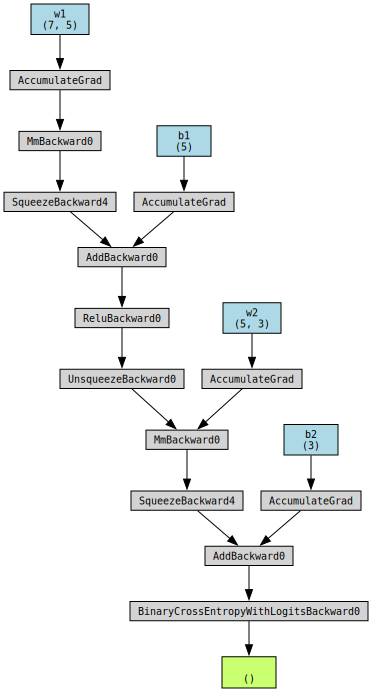

In [28]:
import torch.nn.functional as F
from torchviz import make_dot

"""
F.relu() for ReLU layer.
ex) y = F.relu(x)
"""

x = torch.ones(7) # input: (7,)
y = torch.zeros(3) # output: (3,)

# Generate w1, b1, w2, b2
w1 = torch.randn(7,5, requires_grad=True) # (7, ) @ (7, 5) = (5, )
b1 = torch.randn(5, requires_grad=True) # (5,)
w2 = torch.randn(5, 3, requires_grad=True) # (3,)
b2 = torch.randn(3, requires_grad=True) # (3,)

# Compute z1
z1 = x @ w1 + b1 # (5,)

# Compute z2
z2 = F.relu(z1) # (5,)

# Compute z3
z3 = z2 @ w2 + b2 # (3,)

# Compute loss
loss = F.binary_cross_entropy_with_logits(z3, y)

# Backpropagation
loss.backward()

# Print the gradient of w and b
print(w1.grad)
print(b1.grad)
print(w2.grad)
print(b2.grad)

dot = make_dot(loss, params={"x": x, "w1": w1, "b1": b1, "w2": w2, "b2": b2})
dot

# 2. Intro to ML/DL Implementation

## 2-0. Overall Machine Learning Framework

- Dataset
    - Tabular, Image, Text, Video, Label, ...
- Model
    - MLP, CNN, ... or Your Own Model!
- Training/Evaluating
    - Loss, Optimizer, Metric, ...

<p align="center">
<img src="./img/overall_machine_learning_framework.png">
</p>

## 2-1. Dataset and DataLoader

- `torch.utils.data.Dataset`
    - Called by `DataLoader` implicitly.
    - **Must implement** the following methods:
        - `__init__`: initialize dir/file to read images, transform, etc.
        - `__getitem__`: loads single data with a given index
        - `__len__`: returns the size of dataset(# of data)
> `DataLoader`에 의해 암시적으로 호출됩니다. <br>다음 메서드를 **반드시 구현**해야 합니다.<br> `__init__`: 이미지를 읽을 디렉터리/파일을 초기화하고 변환합니다.<br> `__getitem__`: 주어진 인덱스로 단일 데이터를 로드합니다.<br> `__len__`: 데이터 세트의 크기(# of data)를 반환합니다.

- `torch.utils.data.DataLoader`
    - Dataset을 필요에 맞게 뭉치거나 조작해 model로 전달
    - Parameters
        - batch_size (default = 1)
        - shuffle (default = False)
        - collate_fn (optional)

In [29]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [31]:
import numpy as np
from PIL import Image

### 2-1-1. Dataset

---

- Initializes by setting appropriate info to use the dataset
- (optional) initializes transformations.
> 데이터 세트를 사용하기 위한 적절한 정보를 설정하여 초기화합니다.<br>(선택 사항) 변환을 초기화합니다.

---

---

- Provides a data given idx
> idx를 제공합니다.

---

---

- Provides the size of dataset
> 데이터 세트의 크기를 제공합니다.

---

In [39]:
from torchvision import datasets, transforms
import os

In [48]:
train_dataset = datasets.MNIST(root="../data/",
                               train=True,
                               download=True,
                               transform=transforms.ToTensor())

test_dataset = datasets.MNIST(root = "../data/",
                              train=False,
                              transform=transforms.ToTensor())

# 폴더 생성
output_dir = '../data/mini_MNIST'
os.makedirs(output_dir, exist_ok=True)

# annotations.txt 파일 열기
annotations_path = os.path.join(output_dir, 'annotations.txt')
annotations_file = open(annotations_path, 'w')

# MNIST 데이터셋을 png와 txt파일로 저장하는 함수(100개의 데이터만)
def save_dataset(dataset, output_dir, num_samples=100):
    for index in range(num_samples):
        image, label = dataset[index]
        image = image.squeeze().numpy() * 255 # 1 * 28 * 28 텐서를 28*28로 변환하고 0~255 스케일로 변환
        image = Image.fromarray(image.astype(np.uint8)) # NumPy 배열을 이미지로 변환

        # PNG 파일로 저장
        image.save(f"{output_dir}/image_{index}.png")

        # txt파일로 저장
        with open(f"{output_dir}/label_{index}.txt", 'w') as f:
            f.write(str(label))

        # annotations.txt 파일에 기록
        annotations_file.write(f"image_{index}.png, {label}\n")


In [49]:
# 훈련 데이터셋에서 각각 100개의 데어터 저장
save_dataset(train_dataset, output_dir, num_samples=100)

annotations_file.close()

In [52]:
class SimpleDataset(Dataset):
    def __init__(self):
        lines = []
        with open('../data/mini_MNIST/annotations.txt', 'r') as f:
            lines = f.readlines()

        self.img_label_pairs = []
        for line in lines:
            self.img_label_pairs.append(line.strip().split(','))

    def __getitem__(self, idx):
        # get image path and label corresponding to idx
        img_path, label = self.img_label_pairs[idx]

        # Load image file and convert to numpy array
        img = Image.open('../data/mini_MNIST/' + img_path)
        img = np.array(img)

        # Load label and convert to integer
        label = int(label)

        return img, label
    
    def __len__(self):
        return len(self.img_label_pairs)

In [53]:
dataset = SimpleDataset()
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

In [54]:
# get the image and label using index
idx = 1
img, label = dataset[idx]
print(f'idx: {idx}, img shape: {img.shape}, label: {label}')

idx: 1, img shape: (28, 28), label: 0


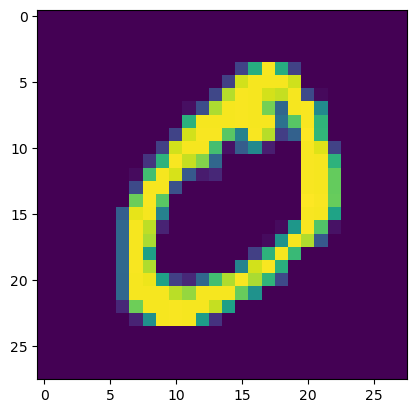

In [55]:
# numpy array to image
import matplotlib.pyplot as plt
plt.imshow(img)

### 2-1-2. DataLoader

---

- \# of samples in a mini-batch: 10
- Shuffles dataset before sampling
> 미니 배치의 샘플 수: 10<br>샘플링 전 데이터 세트를 섞습니다.

---

In [56]:
dataloader = DataLoader(dataset, batch_size = 10, shuffle = True)

In [57]:
for batch in dataloader:
    imgs, labels = batch
    print(f'batch img shape: {imgs.shape}, batch label shape: {labels.shape}')
    break

batch img shape: torch.Size([10, 28, 28]), batch label shape: torch.Size([10])


In [58]:
labels

tensor([7, 3, 0, 0, 0, 0, 9, 3, 3, 1])

## 2-2. Deep Learning Tutorial

### 2-2-1. Dataset and Dataloader

In [61]:
from torchvision import datasets
from torchvision.transforms import ToTensor

# Set dataset
train_data = datasets.MNIST(root="../data", train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root="../data", train=False, download=True, transform=ToTensor())

# Set dataloader
batch_size = 64
train_loader = DataLoader(train_data, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

example data shape:  torch.Size([64, 1, 28, 28])


/var/folders/xs/n50yzwb545zbyw8ns2_vzjww0000gn/T/ipykernel_61093/2897563001.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


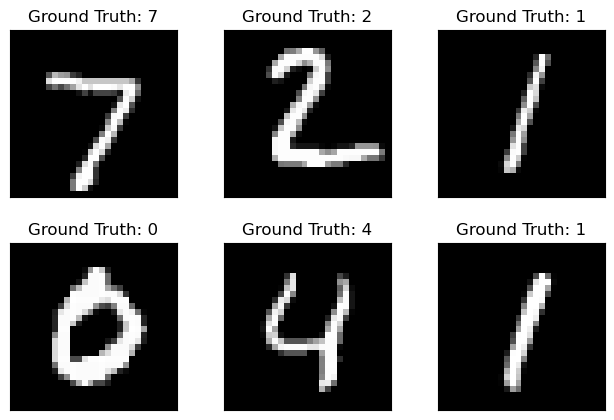

In [63]:
import matplotlib.pyplot as plt

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print("example data shape: ", example_data.shape)

fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

- `collate_fn`
    - Dataset의 각 샘플을 뭉쳐서 batch로 만들 때 할 작업을 정해주는 인자
        - e.g., 서로 길이가 다른 input에 zero-padding을 추가해 길이 맞춰주기
        - e.g., 데이터 augmentation을 위한 transformation
    - Sample 단위의 처리는 Dataset의 `__getitem__()`에서 하게됨
    - <a src="https://pytorch.org/docs/stable/data.html#working-with-collate-fn">https://pytorch.org/docs/stable/data.html#working-with-collate-fn</a>

---

In [108]:
def my_collate_fn(data):
    max_len = 10
    batch = []
    for x, y in data:
        x_padded = torch.cat([x, torch.zeros(max_len-x.shape[0])])
        batch.append(x_padded)
    return torch.stack(batch, dim = 0)

dataset = SimpleDataset()
dataloader = DataLoader(dataset, batch_size=16, collate_fn=my_collate_fn, shuffle=True)

## 2-2. Creating a Model

### 2-2-1. Creatimg a Model
- `torch.nn.module`
    - `__init__()`
        - Declare parameters(layers, etc.)
> 매개변수(레이어 등)를 선언합니다.

- `forward()`
    - Build model with declared parameters
    - Calling model implicitly calls forward function
> 선언된 매개변수로 모델을 구축합니다.<br>모델을 호출하면 암시적으로 forward 함수가 호출됩니다.

In [109]:
import torch.nn as nn
import torch.nn.functional as F

class Simple_NN(nn.Module):
    '''
    - input shape: (1, 28, 28)
    - fc1: apply a linear transformation. output features should be 128
    - fc2: apply a linear transformation. output features should be 64
    - classifier: apply a linear transformation. output features should be the class size(10)

    * input -> fc1 -> relu -> fc2 -> relu -> classifier
    * nn.Linear() for fc layer
    ex fc = nn.Linear(input_dim, output_dim)
        y = fc(x)
    '''

    def __init__(self):
        super(Simple_NN, self).__init__()

        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.classifier = nn.Linear(64, 10)

    def forward(self, x):
        x = x.reshape(-1, 784) # Note: To apply fc layer, input should be flattened (784 = 28 * 28)

        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.classifier(x)

        return x

In [110]:
model = Simple_NN()
print(model)

Simple_NN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (classifier): Linear(in_features=64, out_features=10, bias=True)
)


In [111]:
import torch.nn as nn

class simple_model(nn.Module):
    def __init__(self):
        super(simple_model, self).__init__()
        self.fc_layer = nn.Linear(16, 64)
        self.relu = nn.functional.relu

    def forward(self, x):
        x = self.fc_layer(x)
        x = self.relu(x)
        return x
    
model = simple_model()
print(model)

simple_model(
  (fc_layer): Linear(in_features=16, out_features=64, bias=True)
)


### 2-2-3. Training a Model

- Set train mode on:
    - Train &harr; eval
    - activate/deactivate some layers (e.g., dropout, batch-norm...)
- Set optimization grad to zero for each mini-batch.
- Copy the data to the device where the model exists.
- Backpropagation & update parameters.
- Scheduler decays the learning rate and updates the optimizer with the new learning rate
> - 훈련 모드를 설정합니다:<br>- 훈련 &harr; 평가<br>- 일부 레이어를 활성화/비활성화합니다(예: 드롭아웃, 배치 정규화...)<br>- 각 미니 배치에 대해 최적화 그래디언트를 0으로 설정합니다.<br>- 데이터를 모델이 있는 장치로 복사합니다.<br>- 역전파 및 매개변수 업데이트.<br>- 스케줄러는 학습률을 감소시키고 새 학습률로 옵티마이저를 업데이트합니다.

<p align="center">
<img src="./img/training_a_model.png">
</p>

In [112]:
from tqdm import tqdm

def train(model, train_loader, loss_fn, optimizer, epochs, device, scheduler):
    # (1) Set the mode to train and its device
    model.to(device)
    model.train()

    for epoch in range(epochs):
        train_loss = 0.0

        for batch in tqdm(train_loader):
            # (2) Initialize Gradients
            optimizer.zero_grad()

            # (3) Get input and target from batch and set their device
            input, target = batch
            input, target = input.to(device), target.to(device)

            # (4) Calculate loss and Backpropagate to calculate the gradient
            output = model(input)
            loss = loss_fn(output, target)
            loss.backward()

            # (5)Update model parameters using the optimizer
            optimizer.step()

            train_loss += loss.detach().item()

        # (8) Update the scheduler
        scheduler.step()

        # (0) Calculate the average loss in this epoch
        train_loss /= len(train_loader.dataset)
        print(f'Epoch: {epoch+1}, Training Loss: {train_loss}')


In [113]:
import torch.nn as nn
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 1e-2, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

epochs = 3
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

In [114]:
train(model, train_loader, loss_fn, optimizer, epochs, device, scheduler)

  0%|          | 0/6250 [00:00<?, ?it/s]


RuntimeError: linear(): input and weight.T shapes cannot be multiplied (32x32 and 16x64)

### 2-2-4. Testing a Model

- Set evaluation mode on.
- Set autograd engine off.
    - Autograd: <a src = "https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html">detail</a> automatically track gradients

---

```
input = input.to(device)
target = target.to(device)
```

<span style="color:skyblue">**Possible error when using both CPU and GPU**</span>

<span style="color:brown">RuntimeError</span>: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!(when cheching argument for argument mat1 in method wrapper_addmm)

---

<p align="center">
<img src="./img/testing_a_model.png">
</p>

In [ ]:
def test(model, test_loader, device):
    # Set the mode th train and its device
    model.to(device)
    model.eval()

    with torch.no_grad():
        correct = 0
        for batch in tqdm(test_loader):
            # Get input and target from batch and set their device
            input, target = batch
            input, target = input.to(device), target.to(device)

            # Get output using the model
            output = model(input)

            # Get count of correctly classified images
            pred = output.argmax(dim=1)
            correct += (pred == target.reshape(-1)).sum()

    print(f'\n Accuracy: {correct / len(test_loader.dataset)}')

In [ ]:
test(model, test_loader, device)

100%|██████████| 157/157 [00:00<00:00, 187.77it/s]


 Accuracy: 0.9628999829292297


# 3. Handling Image Dataset

## CIFAR-10 Dataset

- Image dataset with 10 classes:
    airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
- 50,000 training images, 10,000 test images
- Image size: $ 32 \times 32 $

### 3-1. CIFAR-10 Dataset and its Augmentation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader

In [ ]:
train_dataset = datasets.CIFAR10(root="../data/CIFAR_10", train=True, download=True, transform=ToTensor())
test_dataset = datasets.CIFAR10(root="../data/CIFAR_10", train=False, download=True, transform=ToTensor())

batch_size = 8
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

100.0%


Extracting ../data/CIFAR_10/cifar-10-python.tar.gz to ../data/CIFAR_10
Files already downloaded and verified


In [ ]:
CIFAR10_LABEL = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def visualize_batch(batch, augment=None):
    images, labels = batch
    batch_size = images.shape[0]
    pltsize = 2
    plt.figure(figsize = (batch_size * pltsize, pltsize))
    for i in range(batch_size):
        plt.subplot(1, batch_size, i + 1)
        plt.axis('off')
        plt.imshow(np.transpose(augment(images[i]) if augment else images[i], (1, 2, 0)))
        plt.title('Class: ' + str(CIFAR10_LABEL[labels[i].item()]))

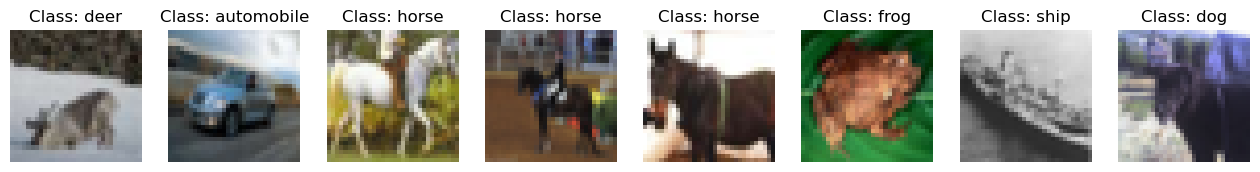

In [ ]:
sample_batch = next(iter(train_loader))
visualize_batch(sample_batch)

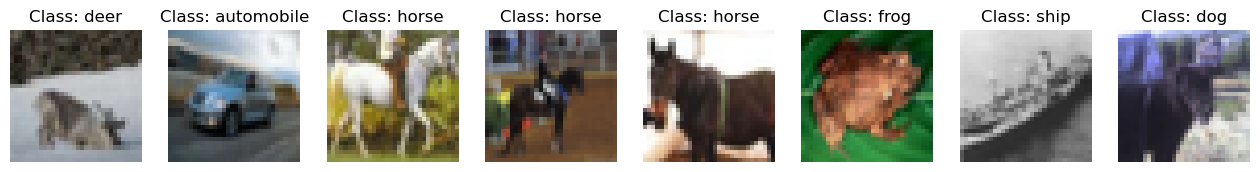

In [ ]:
augment = transforms.RandomHorizontalFlip(p=0.5)
visualize_batch(sample_batch, augment=augment)

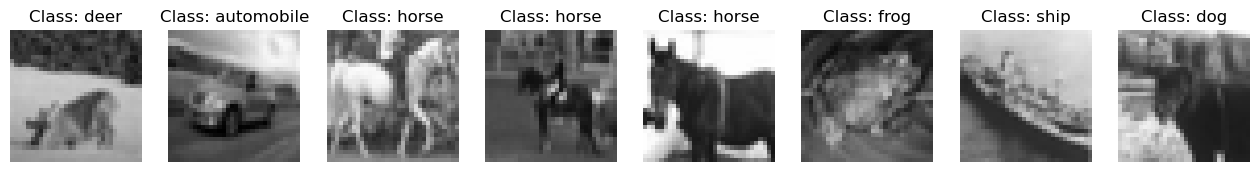

In [ ]:
augment = transforms.Grayscale(num_output_channels=3)
visualize_batch(sample_batch, augment=augment)

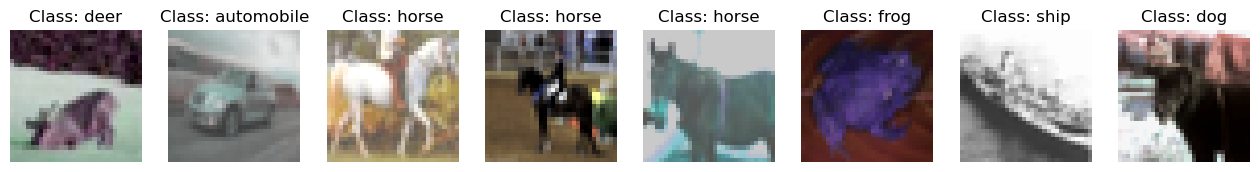

In [ ]:
augment = transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
visualize_batch(sample_batch, augment=augment)

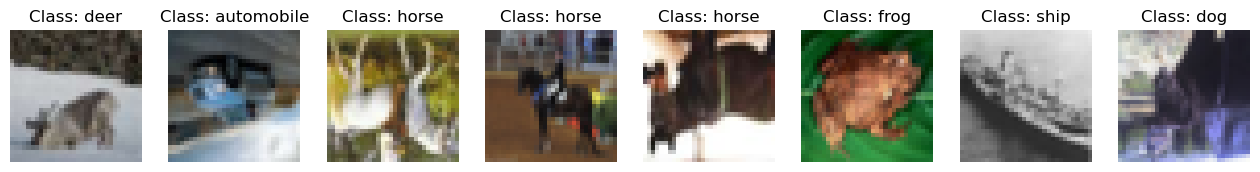

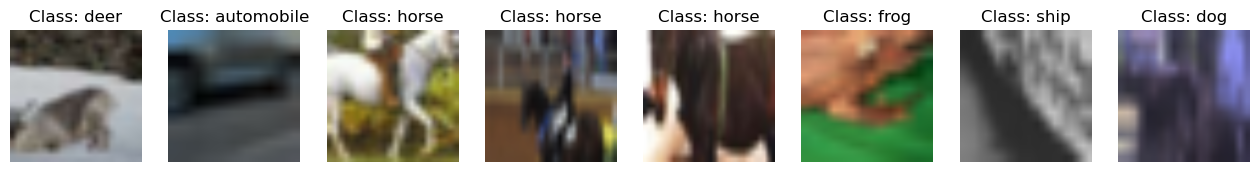

In [ ]:
augment = transforms.RandomVerticalFlip(p=0.5)
visualize_batch(sample_batch, augment=augment)
augment = transforms.RandomResizedCrop((200, 200), scale=(0.1, 1), ratio=(0.5, 2))
visualize_batch(sample_batch, augment=augment)

## Data Augmentation using PyTorch

- Transforming and augmenting images - <a src="https://pytorch.org/vision/0.13/transforms.html">Reference</a>

<p align="center">
<img src="./img/data_augmentation_using_pytorch.png">
<img src="./img/data_augmentation_using_pytorch2.png">
</p>

## Dataset Augmentation in DataLoader

---

1. Define a sequence of transforms to apply to each input image.
2. Include the transformation in the `collate_fn`

---

<p align="center">
<img src="./img/dataset_augmentation_in_dataloader.png">
</p>

### 3-2. Data Augmentation in DataLoader

In [120]:
def collate_fn(data_samples):
    batch_x, batch_y = [], []

    ### AUGMENTATION ###
    augment_transform = transforms.Compose([
        transforms.ColorJitter(brightness=0.5),
        transforms.RandomHorizontalFlip(p=0.5),
    ])

    for image, label in data_samples:
        iamge = augment_transform(image) ## AUGMENTATION
        label = torch.Tensor([label])
        batch_x.append(image)
        batch_y.append(label)
    batch_x = torch.stack(batch_x).float()
    batch_y = torch.cat(batch_y).long()

    return (batch_x, batch_y)

In [121]:
batch_size = 8
train_loader = DataLoader(dataset = train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

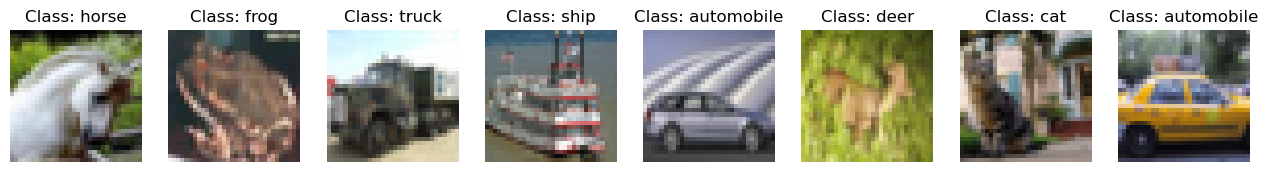

In [122]:
sample_batch = next(iter(train_loader))
visualize_batch(sample_batch)

## Applying Data Augmentation in Practice

- You can also customize your own data augmentation method and apply it to PyTorch datasets.
    - Try it out on your own!
    - References: <a src="https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#transforms">https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#transforms</a>

# Implementation of CNN

## CNN Implementation using PyTorch

- PyTorch library provides basic CNN architectures:
    - `torch.nn.Conv1D`: convolution on 1 dimensional vector: input shape of (batch, channels, size)
    - torch.nn.Conv2D: input shape: (batch, channels, size1, size2)
    - torch.nn.Conv3D: input shape: (batch, channels, size1, size2, size3)
    - Refer to: <a src="https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html">https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html</a>

<p align="center">
<img src="./img/implementation_of_cnn.png">
</p>

In [127]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(in_features=8*16*16, out_features=10),
        )

    def forward(self, x):
        x = self.conv(x)
        return x

In [128]:
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

model = CNN()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

epochs = 3

In [129]:
train(model, train_loader, loss_fn, optimizer, epochs, device, scheduler)

100%|██████████| 6250/6250 [00:35<00:00, 176.22it/s]


Epoch: 1, Training Loss: 0.2594414659738541


100%|██████████| 6250/6250 [00:33<00:00, 186.84it/s]


Epoch: 2, Training Loss: 0.2371890393614769


100%|██████████| 6250/6250 [00:33<00:00, 187.46it/s]

Epoch: 3, Training Loss: 0.2316821422457695


In [130]:
test(model, test_loader, device)

100%|██████████| 1250/1250 [00:02<00:00, 439.16it/s]


 Accuracy: 0.3662000000476837


# Building a CNN Model Using PyTorch

<p align="center">
<img src="./img/building_a_cnn_model_using_pytorch.png">
</p>

## Training a Pytorch Model using GPU

- CNN(): executes __init__() and saves the model object
    - **Define the layers** that organize the model
- model(data): executes forward
    - **Feed the data into the layers** sequentially
    - Same as `model.forward(data)`
> - CNN(): __init__()를 실행하고 모델 객체를 저장합니다.<br>- 모델을 구성하는 레이어를 **정의**합니다.<br>- model(data): forward를 실행합니다.<br>- 데이터를 레이어에 **순차적으로 공급**합니다.<br>- `model.forward(data)`와 동일합니다.

<p align="center">
<img src="./img/training_a_pytorch_model_using_gpu.png">
<img src="./img/training_a_pytorch_model_using_gpu2.png">
</p>


# Architecture Search

- Define your own model (model hyperparameters)
    - How many convolution, pooling, and fully connected layers to use?
    - How many channels to use in each convolution layer?
    - Find the kernel size, padding, and strides with the best performance
    - Which activation function to use?
> - 자신만의 모델을 정의합니다(모델 하이퍼파라미터).<br>- 사용할 컨볼루션, 풀링 및 완전 연결 레이어의 수는 얼마입니까?<br>- 각 컨볼루션 레이어에서 사용할 채널 수는 얼마입니까?<br>- 성능이 가장 좋은 커널 크기, 패딩 및 스트라이드를 찾습니다.<br>- 어떤 활성화 함수를 사용할 것입니까?

- Hyperparameter tuning(training hyperparameters)
    - Search different learning rates
    - Try different batch size
> - 다른 학습률을 검색합니다.<br>- 다른 배치 크기를 시도합니다.

- Other training options
    - Optimizers
    - Loss functions
    - Learning rate scheduling - <a src="https://pytorch.org/docs/stable/optim.html#module-torch.optim.lr_scheduler">documentation</a>
    - ...
> - 옵티마이저<br>- 손실 함수<br>- 학습률 스케줄링 - <a src="https://pytorch.org/docs/stable/optim.html#module-torch.optim.lr_scheduler">documentation</a><br>- ...